In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

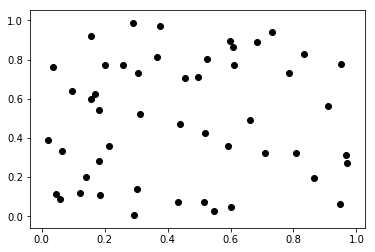

In [6]:
np.random.seed(42)
X = np.array(np.random.rand(50))
Y = np.array(np.random.rand(50))

plt.figure()
plt.scatter(X, Y, color='black')
plt.show()

## Computing Regression Parameters 
## Approach 1: Set Gradient = 0 and Solve 

In [3]:
# varibales we need to calculate 
N = X.shape[0]
x_sum = X.sum()
y_sum = Y.sum()
xy_sum = (X*Y).sum()
x2_sum = (np.square(X)).sum()

In [4]:
numerator = (xy_sum) - (1/N)*((x_sum) * (y_sum))
denominator = (x2_sum) - (1/N)*((x_sum)*(x_sum))
slope = numerator/denominator
print(slope)

0.0660766492981


In [5]:
intercept = y_sum/N - slope * (x_sum/N)
print(intercept)

0.46497242492


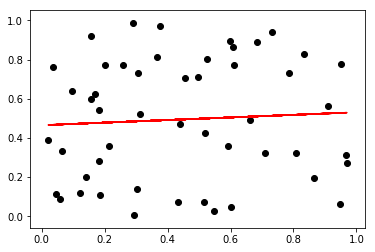

In [10]:
line = intercept + slope * X

plt.scatter(X, Y, color='black')
plt.plot(X, line, color='red')
plt.show()

## Approach 2: Gradient Descent

In [18]:

initial_intercept = 0
initial_slope = 0
# change step_size to see the effect and how important picking the proper 
# step_size is. Try something bigger or smaller.
step_size = 0.005
tolerance = 0.01

magnitude = 1
slope = initial_slope
intercept = initial_intercept
step = 0

for i in range(1,500):
    if magnitude <= tolerance:
        break
    else:
        y_hat = intercept + slope * X
        
    # check and update the Intercept (w0)
    s_error = y_hat - Y
    s_sum = np.sum(s_error)
    s_adjustment = step_size * s_sum
    new_intercept = intercept - s_adjustment
    
    # Check and update the slop (w1)
    i_error = (y_hat - Y) * X
    i_sum = np.sum(i_error)
    i_adjustment = step_size * i_sum
    new_slope = slope - i_adjustment
    
    slope = new_slope
    intercept = new_intercept
    
    line = intercept + slope * X
    magnitude = np.sqrt((i_sum**2) + (s_sum)**2)
    
    # Plot to see how the line changes
    
    step = i
# uncomment if you want to see changes graphically 
#     title = 'Step' + str(i) + ', intercerpt: ' + str(intercept)
#     plt.figure
#     plt.title(title)
#     plt.scatter(X,Y, color='black')
#     plt.plot(X, line, color='red')
#     plt.show()

print('Converged at step = ', step)
print('final slope = ', slope)
print('final intercept = ', intercept)


Converged at step =  229
final slope =  0.0686711837081
final intercept =  0.463731830333


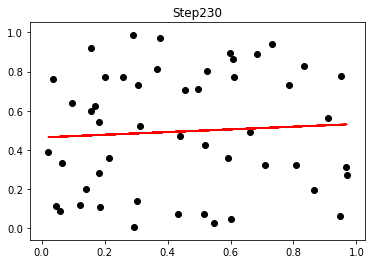

In [19]:
title = 'Step' + str(i)
plt.figure
plt.title(title)
plt.scatter(X,Y, color='black')
plt.plot(X, line, color='red')
plt.show()